In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12576, done.
remote: Total 12576 (delta 0), reused 0 (delta 0), pack-reused 12576
Receiving objects: 100% (12576/12576), 12.43 MiB | 4.07 MiB/s, done.
Resolving deltas: 100% (8620/8620), done.
/content/yolov5
     |████████████████████████████████| 596 kB 7.7 MB/s 
     |████████████████████████████████| 145 kB 6.7 MB/s 
     |████████████████████████████████| 178 kB 52.9 MB/s 
     |████████████████████████████████| 1.1 MB 32.7 MB/s 
     |████████████████████████████████| 67 kB 2.3 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 138 kB 21.4 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
Setup complete. Using torch 1.12.0+cu113 (Tesla T4)


In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/drive/MyDrive/YOLOV5/"

In [ ]:
!python train.py --img 416 --batch 64 --epochs 1000 --data /content/drive/MyDrive/YOLOV5/data.yaml --weights yolov5s.pt --cache

Streaming output truncated to the last 5000 lines.
     Epoch   gpu_mem       box       obj       cls    labels  img_size
     3/999     6.85G    0.1132   0.01828   0.05156        83       416: 100% 2/2 [00:00<00:00,  2.89it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 1/1 [00:00<00:00,  1.27it/s]
                 all        114        115    0.00015     0.0598   8.97e-05   1.59e-05

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     4/999     6.85G    0.1087   0.02145   0.05128       105       416: 100% 2/2 [00:00<00:00,  3.03it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 1/1 [00:00<00:00,  1.21it/s]
                 all        114        115    0.00018     0.0674   0.000108   2.01e-05

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     5/999     6.85G    0.1062    0.0203   0.05084        86       416: 100% 2/2 [00:00<00:00,  2.94it/s

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/drive/MyDrive/Dataset/test

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/Dataset/test, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-379-gf5335f2 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/6 /content/drive/MyDrive/Dataset/test/B1.jpg: 352x416 1 Basophil, Done. (0.012s)
image 2/6 /content/drive/MyDrive/Dataset/test/B2.jpg: 352x416 1 Basophil, Done. (0.011s)
image 3/6 /content/drive/MyDrive/Dataset/test/E1.jpg: 352x416 1 Eosinophil, Done. (0.008s)
image 4/6 /content/drive/MyDrive/Dataset/test/M1.jpg: 352x41

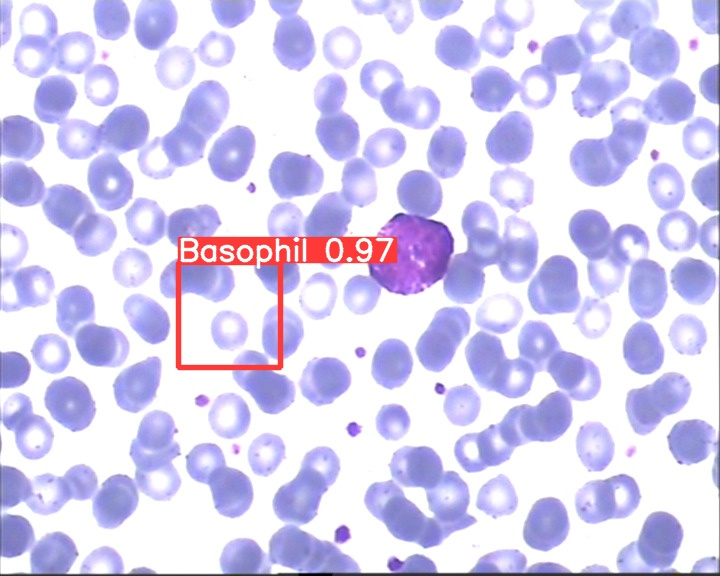

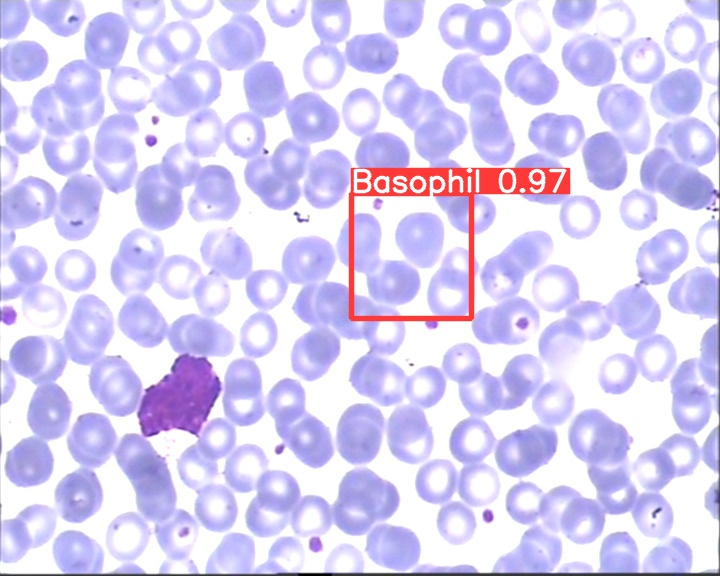

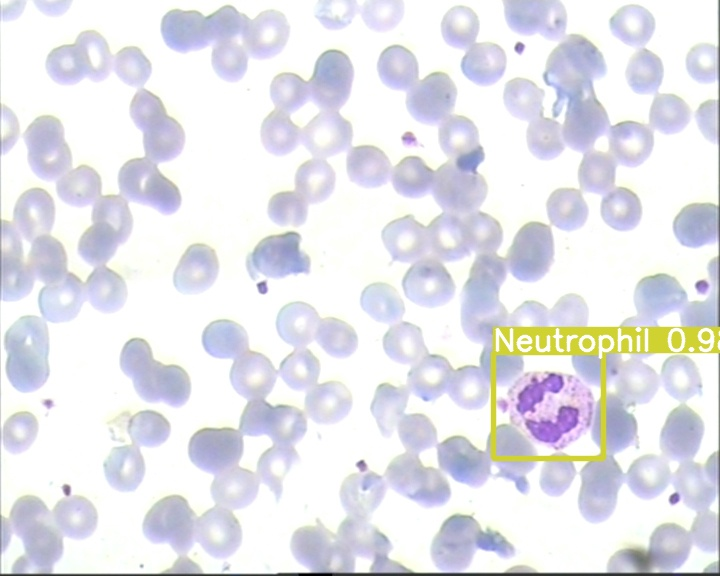

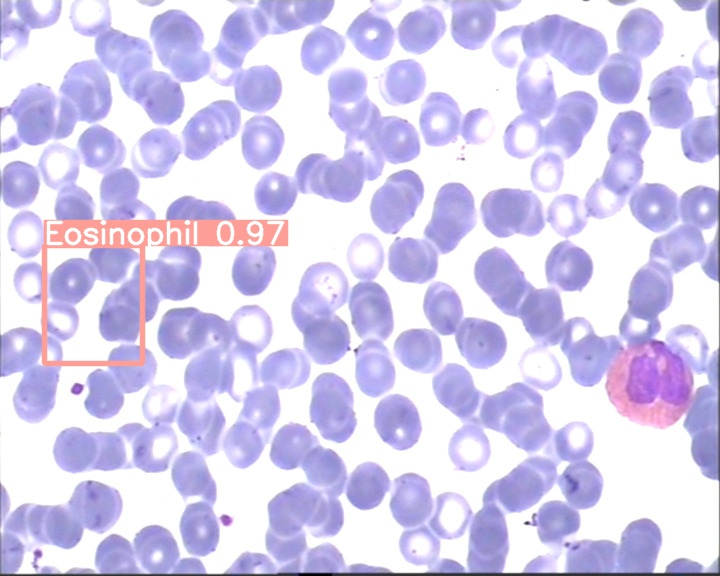

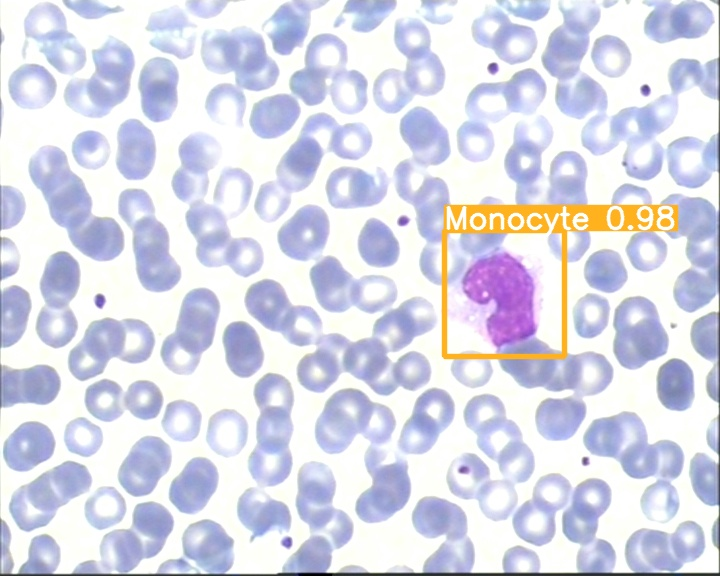

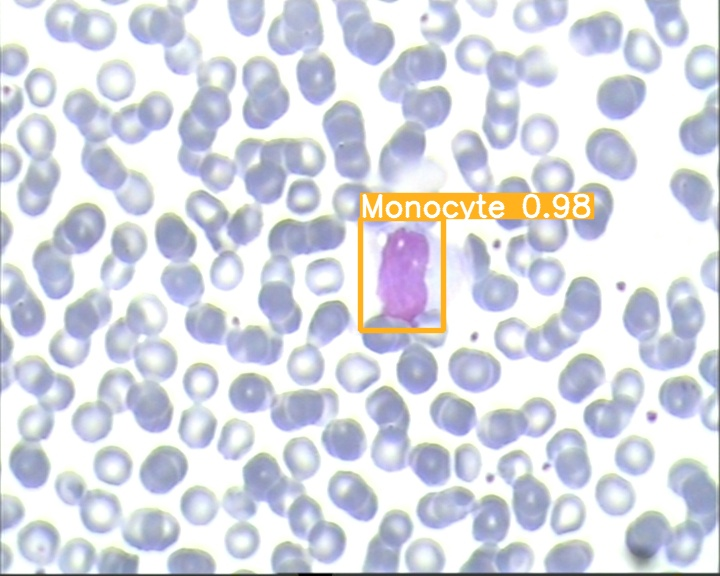

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")